
<img width= "300" src="https://cdn.discordapp.com/attachments/392490318798389248/945695517004951633/jeanettes_fireart.png" alt="US Fires Logo">

# From Singh and Orsinger

### to Lori Ainslie, Jeanette Schulz, Kristine Cabanela, and Sophia Stewart 
### Last Updated: 2 March 2022

In [70]:
# Data Science Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import explore as e

import pylab

# Group-made functions
from wrangle import *

# Blocking Warning Boxes
import warnings
warnings.filterwarnings("ignore")

# Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)


In [2]:
df = wrangle_fires()

df.head()

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA,101676000.0,west,1.008831e+09,small
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA,101676000.0,west,1.008831e+09,small
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA,101676000.0,west,1.008831e+09,small
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA,101676000.0,west,1.008831e+09,small
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA,101676000.0,west,1.008831e+09,small


## Up to you: Defining your threshold for what is "big" or "small". 

## Question 1 - What's the relationship between fire size and region?

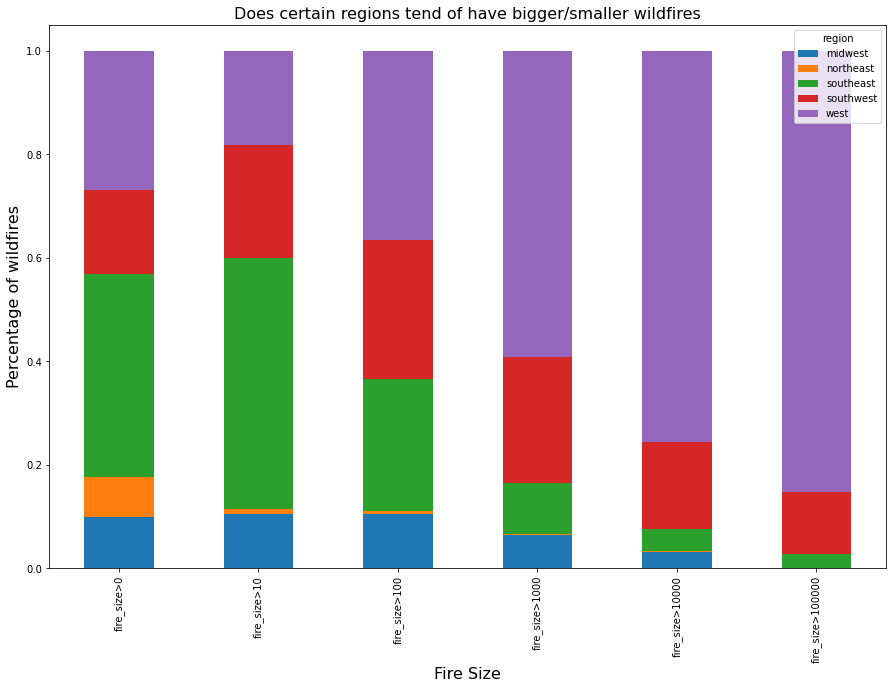

In [3]:
prop = pd.DataFrame(df[df.fire_size > 0].groupby('region').count()['state']/df[df.fire_size > 0].groupby('region').count()['state'].sum())
prop.columns = ['fire_size>0']

thresholds = [10, 100, 1000, 10000, 100000]
for thresh in thresholds:
    prop['fire_size>' + str(thresh)] = df[df.fire_size > thresh].groupby('region').count()['state']/df[df.fire_size > thresh].groupby('region').count()['state'].sum()
    
# Does Does the proportion of wildfires in region vary by fire size?
prop.T.plot(kind = 'bar', stacked = True, figsize = (15,10))
plt.ylabel('Percentage of wildfires',fontsize = 16)
plt.xlabel('Fire Size', fontsize = 16)
plt.title('Does certain regions tend of have bigger/smaller wildfires', fontsize = 16);

## Question 2 In a state  (CA) (or another state if you use this as a template)
- are large fire counts increasing? 
- are small fire counts increasing? 

Text(0, 0.5, 'Number of fires')

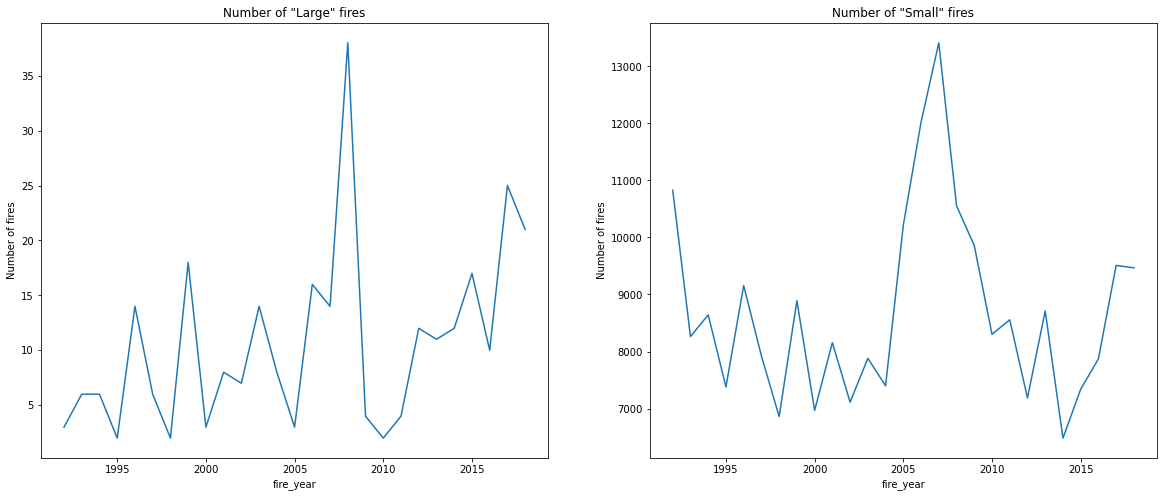

In [4]:
plt.figure(figsize = (20,8))
plt.subplot(121)
df[df.state == 'CA'][df.fire_size > 10000].groupby('fire_year').fire_size.count().plot()
plt.title('Number of "Large" fires')
plt.ylabel('Number of fires')

plt.subplot(122)
df[df.state == 'CA'][df.fire_size < 10000].groupby('fire_year').fire_size.count().plot()
plt.title('Number of "Small" fires')
plt.ylabel('Number of fires')

In [57]:
df2 = df[df.fire_size < 5000].groupby('fire_year').fire_size.count().to_frame()
df2.fire_size = round(df2.fire_size / 1000)
df2.head()

,fire_size
fire_year,
1992,68.0
1993,62.0
1994,76.0
1995,71.0
1996,75.0


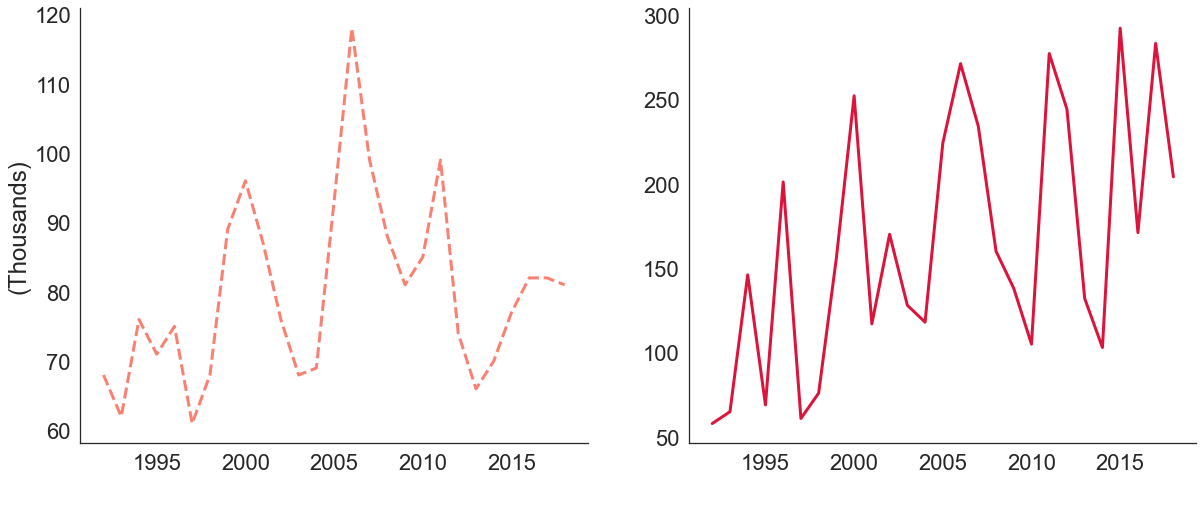

In [78]:
sns.set_style('white')

plt.figure(figsize = (20,8))
plt.subplot(121)
plt.plot(df2, color='salmon', ls='--', lw=3)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('(Thousands)')

plt.subplot(122)
df[df.fire_size >= 5000].groupby('fire_year').fire_size.count().plot(color='crimson', lw=3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel(' ');

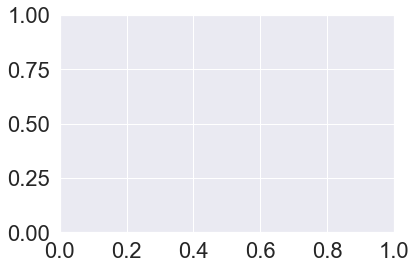

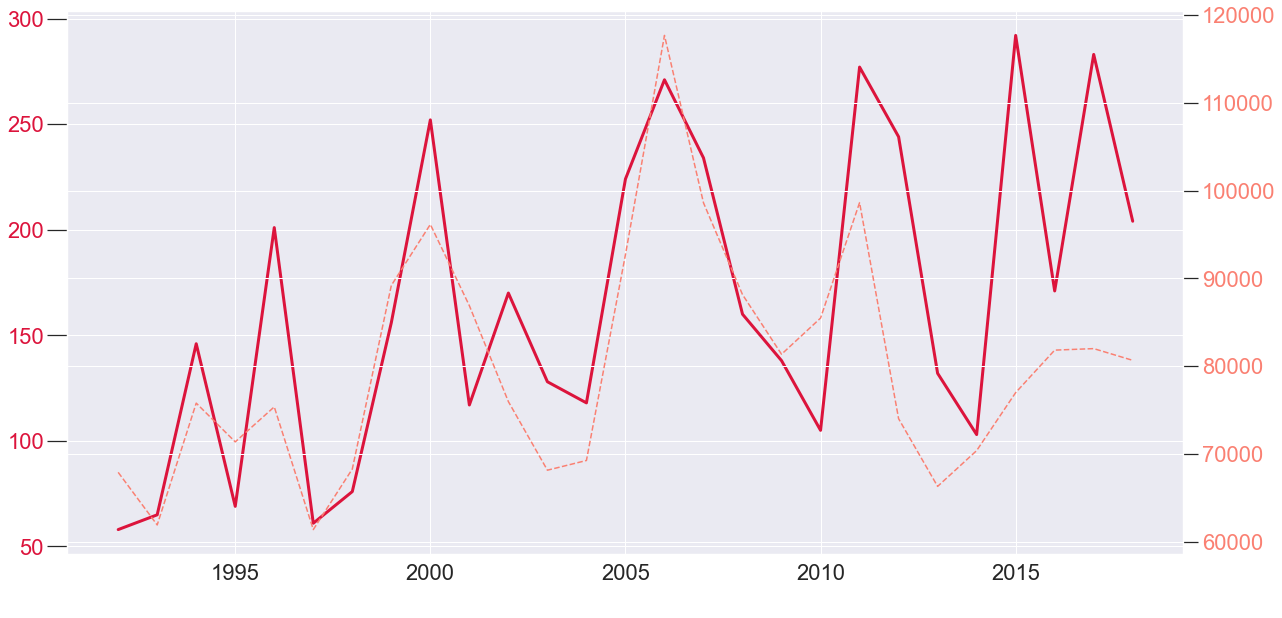

In [53]:


fig, ax1 = plt.subplots()
plt.figure(figsize = (20,10))

sns.set(font_scale = 2)

color = 'crimson'
ax1 = df[df.fire_size >= 5000].groupby('fire_year').fire_size.count().plot(color='crimson', lw=3)
# ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color, size=20)
plt.xlabel(' ')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'salmon'
ax2.plot(df[df.fire_size < 5000].groupby('fire_year').fire_size.count(), color='salmon', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color, size=15)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show();

## Question 3
- Are acres burned for large fires going up? Are large fires burning more area over time?
- Are small fires burning more or less area over time?
- Todo: break out by other state like TX or GA or by regions.. (this could show more possibilities)

Text(0, 0.5, 'Area burned')

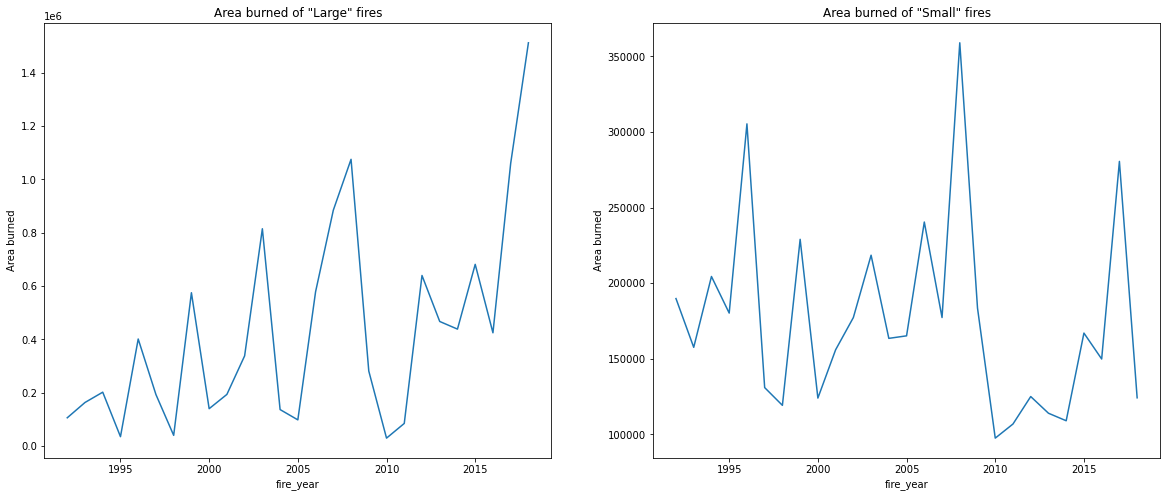

In [6]:
# How about burned area when controlling for fire size?

plt.figure(figsize = (20,8))
plt.subplot(121)
df[df.state == 'CA'][df.fire_size > 10000].groupby('fire_year').fire_size.sum().plot()
plt.title('Area burned of "Large" fires')
plt.ylabel('Area burned')


plt.subplot(122)
df[df.state == 'CA'][df.fire_size < 10000].groupby('fire_year').fire_size.sum().plot()
plt.title('Area burned of "Small" fires')
plt.ylabel('Area burned')

In [12]:
df['fire_size_m'] = (df[df.fire_size > 5000].groupby('fire_year').fire_size.sum())

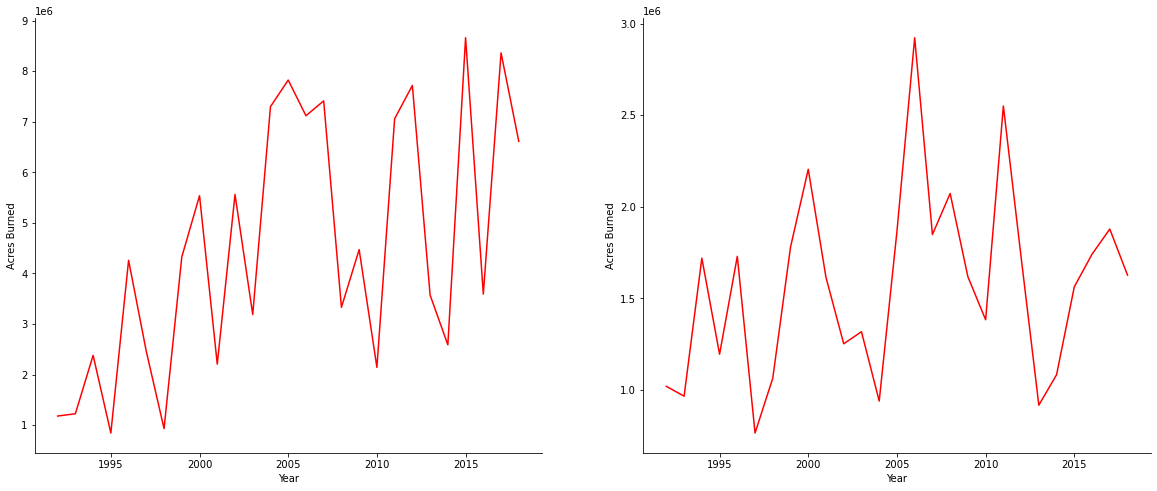

In [33]:

plt.figure(figsize = (20,8))
plt.subplot(121)
df[df.fire_size > 5000].groupby('fire_year').fire_size.sum().plot(color='red')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Acres Burned')
plt.xlabel('Year')


plt.subplot(122)
df[df.fire_size < 5000].groupby('fire_year').fire_size.sum().plot(color='red')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Acres Burned')
plt.xlabel('Year');

---
# Explore
---

_by (fire_size instead of n_occurences)_

- Example 1 = Top causes of wildfires over the years, by fire_size for US (todo) 
- Example 2 = Top causes of wildfires over the years, plotted by fire_size for TX
- TODO: Use copy/paste/edit code from Example 2 to use for other states

In [14]:
# Creating a time-series dataframe
time_df = df
time_df = time_df.set_index('discovery_date').sort_index()
time_df['year'] = time_df.index.year
time_df.head(2)

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,fire_size_m,year
discovery_date,,,,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,37745000.0,southeast,3.670760e+08,small,NaN,1992
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,62604000.0,west,1.008831e+09,small,NaN,1992


## Example 1: fire_size by cause over the years

In [15]:
# US Top 5 causes of wildfires by size (not occurrence count)
top_causes = time_df.groupby("general_cause").fire_size.sum().sort_values(ascending=False).head(5).index
top_causes.tolist()

['Natural',
 'Missing data/not specified/undetermined',
 'Arson/incendiarism',
 'Equipment and vehicle use',
 'Debris and open burning']

In [16]:
# All of US fire Cause, Fire size, over time
# group by general_cause, sum fire_size, show year
us = time_df.groupby(['general_cause', 'year']).fire_size.sum().reset_index()
us.head()

,general_cause,year,fire_size
0,Arson/incendiarism,1992,267422.330
1,Arson/incendiarism,1993,192829.403
2,Arson/incendiarism,1994,477384.607
3,Arson/incendiarism,1995,293903.820
4,Arson/incendiarism,1996,515666.440


In [17]:
# separate each of the top four causes into their own dataframe
natural = us[us.general_cause == "Natural"]
missing = us[us.general_cause == "Missing data/not specified/undetermined"]
arson = us[us.general_cause == "Arson/incendiarism"]
equipment = us[us.general_cause == "Equipment and vehicle use"]
debris = us[us.general_cause == "Debris and open burning"]

In [18]:
# set the year column as the index for each of the dataframes
natural = natural.set_index("year")
missing = missing.set_index("year")
arson = arson.set_index("year")
equipment = equipment.set_index("year")
debris = debris.set_index("year")

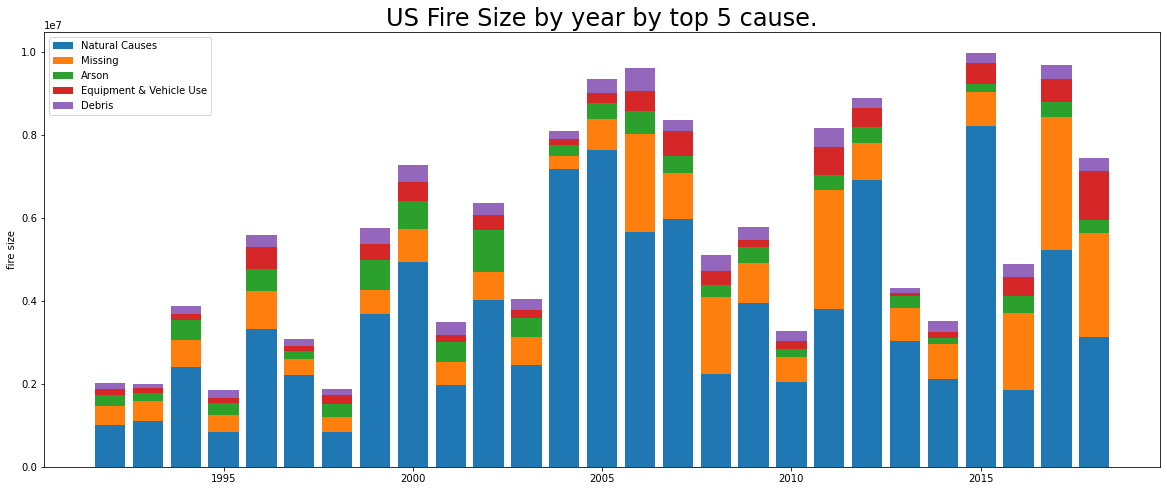

In [19]:
# create the subplots
fig, ax = plt.subplots(figsize = (20,8))

labels = debris.index
# plot the number of occurrences for each cause by year
ax.bar(labels, natural.fire_size, label="Natural Causes")
ax.bar(labels, missing.fire_size, label="Missing", bottom=natural.fire_size)
ax.bar(labels, arson.fire_size, label="Arson", bottom=missing.fire_size + natural.fire_size)
ax.bar(labels, equipment.fire_size, label="Equipment & Vehicle Use", bottom=arson.fire_size + natural.fire_size + missing.fire_size)
ax.bar(labels, debris.fire_size, label="Debris", bottom=equipment.fire_size + arson.fire_size + natural.fire_size + missing.fire_size)

ax.legend()
ax.set_ylabel("fire size")
ax.set_title("US Fire Size by year by top 5 cause.", fontdict={'fontsize': 24});

## Example Number 2 = Zooming in on TX. fire_size by cause over the years

(use this as a template for other states like CA and GA)

In [20]:
# Texas
texas_time = time_df[time_df.state == "TX"]
texas_time.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,fire_size_m,year
discovery_date,,,,,,,,,,,,,
1992-01-01,1992,Equipment and vehicle use,NaT,30.0,30.19375,-97.32291,TX,171057000.0,southwest,366582000.0,small,NaN,1992
1992-01-01,1992,Debris and open burning,NaT,3.0,30.48542,-93.99375,TX,171057000.0,southwest,366582000.0,small,NaN,1992
1992-01-01,1992,Debris and open burning,NaT,5.0,31.66458,-94.58958,TX,171057000.0,southwest,366582000.0,small,NaN,1992
1992-01-06,1992,Debris and open burning,NaT,3.0,31.34792,-93.94375,TX,171057000.0,southwest,366582000.0,small,NaN,1992
1992-01-07,1992,Missing data/not specified/undetermined,NaT,5.0,31.05208,-93.71042,TX,171057000.0,southwest,366582000.0,small,NaN,1992


In [21]:
texas_time.groupby('general_cause').fire_size.sum().sort_values(ascending=False).head()

general_cause
Missing data/not specified/undetermined       6.022474e+06
Natural                                       2.121074e+06
Equipment and vehicle use                     1.103576e+06
Debris and open burning                       8.320171e+05
Power generation/transmission/distribution    6.953056e+05
Name: fire_size, dtype: float64

In [22]:
tx_top_causes_of_wildfires = texas_time.groupby('general_cause').fire_size.sum().sort_values(ascending=False).head().index
tx_top_causes_of_wildfires

Index(['Missing data/not specified/undetermined', 'Natural',
       'Equipment and vehicle use', 'Debris and open burning',
       'Power generation/transmission/distribution'],
      dtype='object', name='general_cause')

In [23]:
# Texas only Fire Cause, Fire size, over time
# group by general_cause, sum fire_size, show year
tx = texas_time.groupby(['general_cause', 'year']).fire_size.sum().reset_index()
tx.head()

,general_cause,year,fire_size
0,Arson/incendiarism,1992,5657.1
1,Arson/incendiarism,1993,11250.7
2,Arson/incendiarism,1994,28354.5
3,Arson/incendiarism,1995,25456.0
4,Arson/incendiarism,1996,47938.8


In [24]:
# group by general_cause, sum fire_size, show year
# Sum of fire size per year, per cause
tx_fire_size_by_year_cause = tx.groupby(["general_cause", 'year']).fire_size.sum().reset_index()
tx_fire_size_by_year_cause.head()

,general_cause,year,fire_size
0,Arson/incendiarism,1992,5657.1
1,Arson/incendiarism,1993,11250.7
2,Arson/incendiarism,1994,28354.5
3,Arson/incendiarism,1995,25456.0
4,Arson/incendiarism,1996,47938.8


In [25]:
# separate each of the top four causes into their own dataframe
missing = tx_fire_size_by_year_cause[tx_fire_size_by_year_cause.general_cause == "Missing data/not specified/undetermined"]
natural = tx_fire_size_by_year_cause[tx_fire_size_by_year_cause.general_cause == "Natural"]
equipment = tx_fire_size_by_year_cause[tx_fire_size_by_year_cause.general_cause == "Equipment and vehicle use"]
debris = tx_fire_size_by_year_cause[tx_fire_size_by_year_cause.general_cause == "Debris and open burning"]
power = tx_fire_size_by_year_cause[tx_fire_size_by_year_cause.general_cause == "Power generation/transmission/distribution"]

In [26]:
# set the year column as the index for each of the dataframes
missing = missing.set_index("year")
natural = natural.set_index("year")
equipment = equipment.set_index("year")
debris = debris.set_index("year")
power = power.set_index("year")

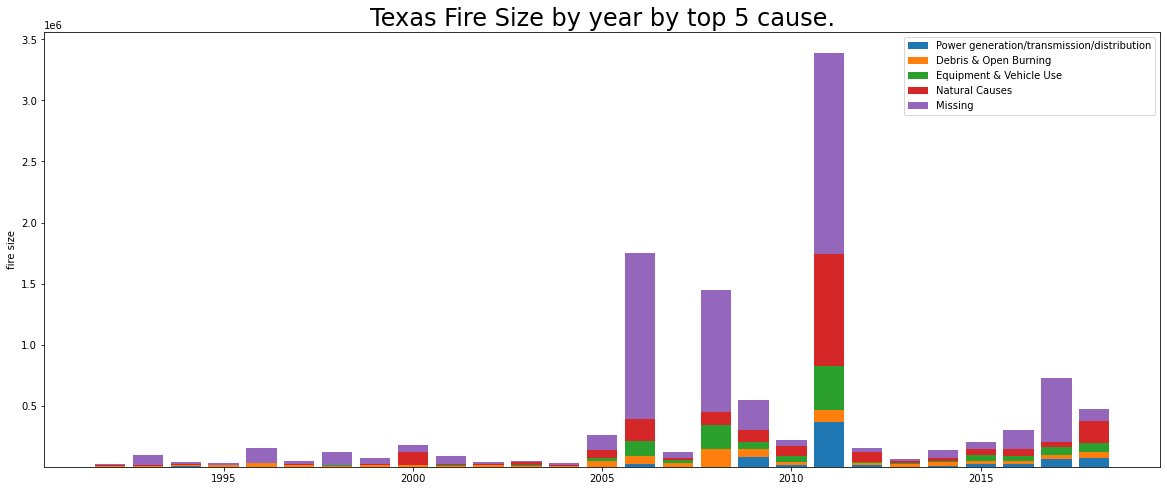

In [27]:
# create the subplots
fig, ax = plt.subplots(figsize = (20,8))

labels = debris.index
# plot the number of occurrences for each cause by year
ax.bar(labels, power.fire_size, label="Power generation/transmission/distribution")
ax.bar(labels, debris.fire_size, label="Debris & Open Burning", bottom=power.fire_size)
ax.bar(labels, equipment.fire_size, label="Equipment & Vehicle Use", bottom=debris.fire_size + power.fire_size)
ax.bar(labels, natural.fire_size, label="Natural Causes", bottom=debris.fire_size + power.fire_size + equipment.fire_size)
ax.bar(labels, missing.fire_size, label="Missing", bottom=debris.fire_size + power.fire_size + equipment.fire_size + natural.fire_size)


ax.legend()
ax.set_ylabel("fire size")
ax.set_title("Texas Fire Size by year by top 5 cause.", fontdict={'fontsize': 24});

## Example 3: Top 4 causes of TX wildfires with "missing" removed
- What do top 4 causes of TX wildfires look like over time and fire_size with "missing" removed?

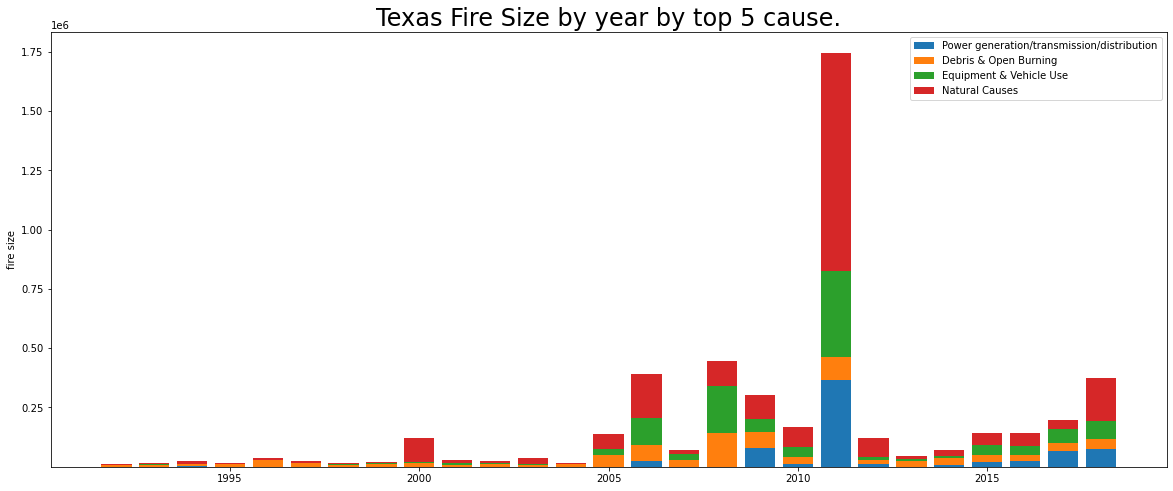

In [28]:
# create the subplots
fig, ax = plt.subplots(figsize = (20,8))

labels = debris.index
# plot the number of occurrences for each cause by year
ax.bar(labels, power.fire_size, label="Power generation/transmission/distribution")
ax.bar(labels, debris.fire_size, label="Debris & Open Burning", bottom=power.fire_size)
ax.bar(labels, equipment.fire_size, label="Equipment & Vehicle Use", bottom=debris.fire_size + power.fire_size)
ax.bar(labels, natural.fire_size, label="Natural Causes", bottom=debris.fire_size + power.fire_size + equipment.fire_size)

ax.legend()
ax.set_ylabel("fire size")
ax.set_title("Texas Fire Size by year by top 5 cause.", fontdict={'fontsize': 24});

## Takeaways
- What the heck happened in 2011? This jump in all causes including "missing" is only in TX for this year, not the US?
- Power generation is a top 5 cause of wildfires in TX but not the US. For US it's lower down the list but still top 10
- Region and fire size are related! Cool find!
- What's happening w/ number of large fires over time?


# Other Questions
- Are the number of large fires increasing over time? (I think the team already found "yes")
- Are the number of large fires increasing over time by state? (TX, GA, CA, other top states)
- Are the number of small fires increasing over time?
- Are the number of small fires increasing over time for TX? for GA? for CA?